# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory.
#import os
#os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving requirements.txt to requirements.txt
User uploaded file "requirements.txt" with length 253 bytes


#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 8.8 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
from torch.utils.data import DataLoader, random_split
import torchvision.datasets as datasets
# Define transforms
## YOUR CODE HERE ##
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
mnist_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_size = int(0.6 * len(mnist_dataset))
val_size = int(0.2 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size - val_size

# Perform the random split
train_data, val_data, test_data = random_split(mnist_dataset, [train_size, val_size, test_size])

# Define the data loaders
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100)

100%|██████████| 9912422/9912422 [00:00<00:00, 120589001.56it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73998591.22it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32214284.23it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15425529.37it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Needed to convert the image data to a tensor.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


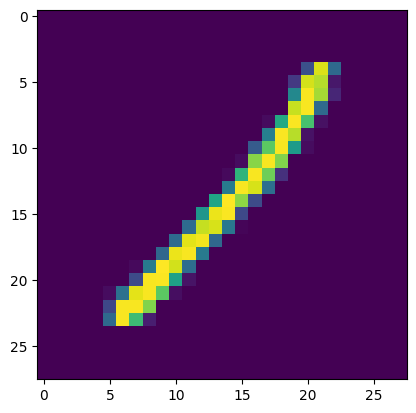

7


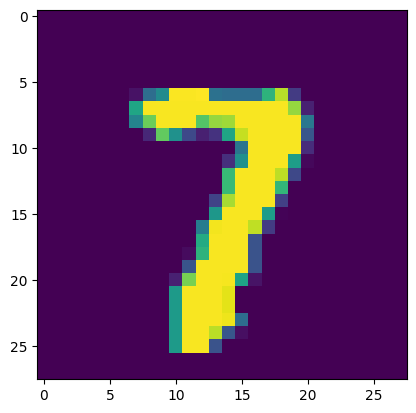

3


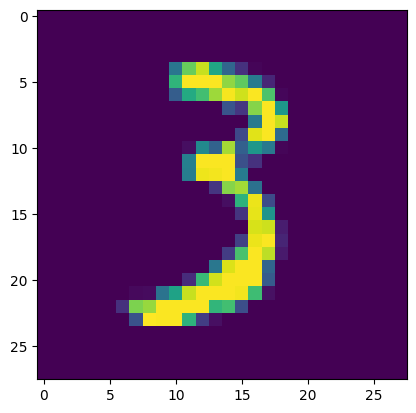

1


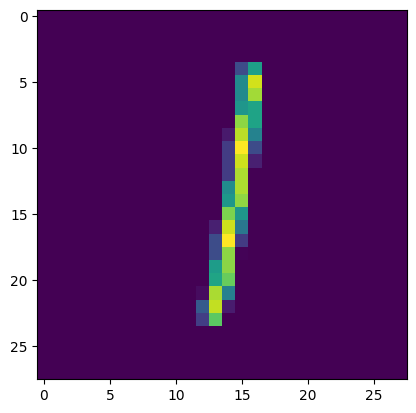

8


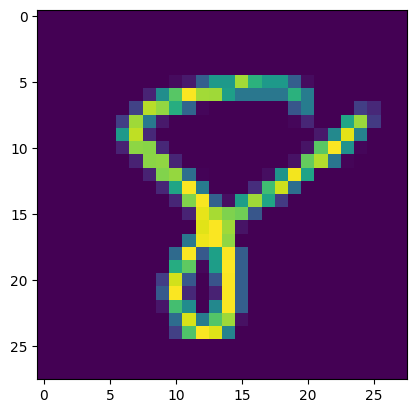

In [6]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self): #constructor
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) #flattening the layer
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

net = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Define the number of training epochs
num_epochs = 3
# Create empty lists to store training and validation loss history
train_loss_history = list()
val_loss_history = list()

# Iterate through each epoch
for epoch in range(num_epochs):
    # Set the model to training mode
    net.train()
    # Initialize variables to store training loss and correct predictions
    train_loss = 0.0
    train_correct = 0

    # Iterate through the training data loader
    for i, data in enumerate(train_loader):
        # Get input data and labels from the data loader
        inputs, labels = data
        # Zero the gradients to prepare for backpropagation
        optimizer.zero_grad()

        # Forward pass: compute model predictions
        outputs = net(inputs)
        # Compute the loss between predictions and actual labels
        loss = criterion(outputs, labels)

        # Backward pass: compute gradients and update model parameters
        loss.backward()
        optimizer.step()

        # Compute training accuracy and accumulate training loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()

    # Print training accuracy and loss for the current epoch
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    # Save the average training loss to the history list
    train_loss_history.append(train_loss/len(train_loader))

    # Switch the model to evaluation mode for validation
    net.eval()
    # Initialize variables to store validation loss and correct predictions
    val_loss = 0.0
    val_correct = 0

    # Iterate through the validation data loader
    for inputs, labels in test_loader:
        # Forward pass: compute model predictions
        outputs = net(inputs)
        # Compute the loss between predictions and actual labels
        loss = criterion(outputs, labels)

        # Compute validation accuracy and accumulate validation loss
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()

    # Print validation accuracy and loss for the current epoch
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    # Save the average validation loss to the history list
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 85.14% training loss: 0.51743
Epoch 1 validation accuracy: 90.62% validation loss: 0.31000
Epoch 2 training accuracy: 92.29% training loss: 0.25749
Epoch 2 validation accuracy: 92.67% validation loss: 0.24342
Epoch 3 training accuracy: 94.23% training loss: 0.19619
Epoch 3 validation accuracy: 94.58% validation loss: 0.18238


Plot the training loss (and validation loss/accuracy, if recorded).

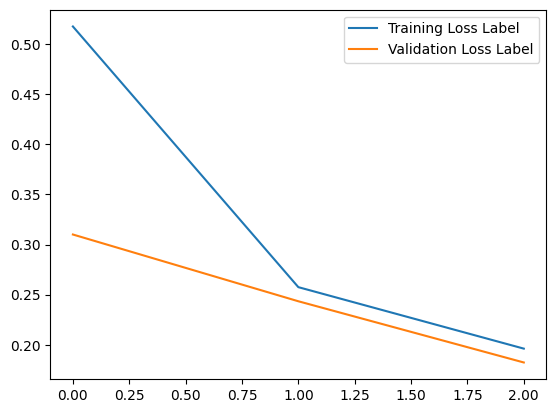

In [10]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss Label")
plt.plot(val_loss_history, label="Validation Loss Label")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
def test():
    # Set the model to evaluation mode
    net.eval()
    # Initialize variables to store test loss and correct predictions
    test_loss = 0
    test_correct = 0

    # Iterate through the test data loader
    for i, data in enumerate(test_loader):
        # Get input data and labels from the data loader
        inputs, labels = data

        # Zero the gradients to prepare for backpropagation (even though this is a test function, it's included)
        optimizer.zero_grad()

        # Forward pass: compute model predictions
        outputs = net(inputs)
        # Compute the loss between predictions and actual labels
        loss = criterion(outputs, labels)

        # Backward pass: compute gradients (even though this is a test function, it's included for consistency)
        loss.backward()
        # Optimizer step is not necessary in the test phase since we are not updating the model parameters

        # Compute test accuracy and accumulate test loss
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()

    # Print test accuracy and loss for the current epoch (note: 'epoch' is not defined in this function)
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

# Iterate through the specified number of epochs
for epoch in range(num_epochs):
    # Call the 'test' function for each epoch
    test()

Epoch 1 test accuracy: 94.58% test loss: 0.18238
Epoch 2 test accuracy: 94.58% test loss: 0.18238
Epoch 3 test accuracy: 94.58% test loss: 0.18238


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##
#No need since appropriate accuracy achieved

## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
## YOUR CODE HERE ##
torch.save(Net, "Net.pth")